In [1]:
# first, second
# bids , values --> random Uniform[0,1]
# 1000 auction in each turn (for each turn we evalute )
# 1000 turns 

# u0,u1,u2 compute 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def utility(NumberOfAuctions, myValues, myBids, secondBids, myBudget, secondBudget):
    n = NumberOfAuctions
    if n==0:
    #    print("...THE AUCTION ENDED....\\")
        return 0
    else:
        mybid0 = min(myBids[0], myBudget)
        itsbid0 = min(secondBids[0], secondBudget)
       # print("my bid:", mybid0, " and its bid:", itsbid0)
        if mybid0==0 and itsbid0==0:
            return 0
        elif mybid0 > itsbid0:
#           I win this auction
         #   print("I won")
            v0 = myValues[0]
          #  print("new Budgets :",myBudget-itsbid0, secondBudget,"my value:",v0)
            del secondBids[0]
            del myBids[0]
            del myValues[0]
            return v0 + utility(n-1, myValues, myBids, secondBids, round(myBudget-itsbid0,2), round(secondBudget,2))
        else:
#           I lose this auction
         #   print("I lost")
         #   print("new Budgets :",myBudget, secondBudget-mybid0)
            del secondBids[0]
            del myBids[0]
            del myValues[0]
            return utility(n-1, myValues, myBids, secondBids, round(myBudget,2), round(secondBudget-mybid0,2))    

In [20]:
def f0(landa, values):
    return[round(values[i]*landa,3) for i in range(len(values))]

In [21]:
def f1(landa, values):
    return[round(values[i]*landa + 0.5,3) for i in range(len(values))]

In [22]:
def f2(landa,mu, values):
    return[round(values[i]*landa + 0.5 - landa*mu,3) for i in range(len(values))]

In [22]:
def f0eps(landa,mu, values):
    return[
        round(values[i]*landa + 0.5 - landa*mu,3) for i in range(len(values))]

In [95]:
n = 1000 #Number of auctions in a sample run
m = 50000 #Number of sample runs
second_bids = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]
my_values = [[round(np.random.random(),3) for i in range(n)] for j in range(m)]

In [77]:
def u0(landa0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    B1,B2=100,100
    return utility(n, val_1, f0(landa0, val_1), s_bids, B1, B2)

In [78]:
def mean0(landa0):
    v=0
    for i in range(m):
        v=v+u0(landa0,i)

        
    print("landa",landa0,"v:", v)
    

    return (v//m)

In [79]:
def u1(landa0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    B1,B2=100,100
    return utility(n, val_1, f1(landa0, val_1), s_bids, B1, B2)

In [80]:
def mean1(landa0):
    v=0
    for i in range(m):
        v=v+u1(landa0,i)    
    
    
    print("landa",landa0,"v:", v)

    return (v//m)

In [81]:
def u2(landa0,mu0,m):
    val_1 = [x for x in my_values[m]]
    s_bids = [x for x in second_bids[m]]
    B1,B2=100,100
    return utility(n, val_1, f2(landa0, mu0, val_1), s_bids, B1, B2)

In [82]:
def mean2(landa0,mu0):
    v=0
    for i in range(m):
        v=v+u1(landa0,mu0,m)
        
        
    print("v:", v)
    

    return (v//m)

In [83]:
revs0 = [mean0(x/40) for x in range(60)]

landa 0.0 v: 0
landa 0.025 v: 80587.1980000003
landa 0.05 v: 163235.48199999932
landa 0.075 v: 247131.94699999987
landa 0.1 v: 330690.37999999884
landa 0.125 v: 413565.1279999981
landa 0.15 v: 496908.3279999987
landa 0.175 v: 580544.7219999991
landa 0.2 v: 663742.4710000006
landa 0.225 v: 747840.069999999
landa 0.25 v: 997944.9789999969
landa 0.275 v: 1342112.1259999955
landa 0.3 v: 1612826.1810000015
landa 0.325 v: 1827312.7859999987
landa 0.35 v: 2009852.0179999992
landa 0.375 v: 2161299.046000005
landa 0.4 v: 2286189.0730000003
landa 0.425 v: 2399308.6809999994
landa 0.45 v: 2504747.5750000128
landa 0.475 v: 2586141.4380000043
landa 0.5 v: 2880991.2219999987
landa 0.525 v: 2969858.3070000038
landa 0.55 v: 3044689.808
landa 0.575 v: 3119871.083000008
landa 0.6 v: 3184744.453
landa 0.625 v: 3254371.9610000164
landa 0.65 v: 3309644.169000006
landa 0.675 v: 3369490.827999991
landa 0.7 v: 3411748.426000012
landa 0.725 v: 3466225.1649999963
landa 0.75 v: 3521284.575
landa 0.775 v: 3569433

In [84]:
revs1 = [mean1(x/40) for x in range(60)] 

landa 0.0 v: 3999712.6399999885
landa 0.025 v: 3974658.4870000044
landa 0.05 v: 3991876.257000007
landa 0.075 v: 4026111.6569999927
landa 0.1 v: 4053925.829000005
landa 0.125 v: 4074598.350999995
landa 0.15 v: 4100971.105000011
landa 0.175 v: 4130079.217999998
landa 0.2 v: 4151933.0860000025
landa 0.225 v: 4146146.643999983
landa 0.25 v: 4090640.0789999957
landa 0.275 v: 3910782.24900002
landa 0.3 v: 3501522.3040000084
landa 0.325 v: 2914576.6709999978
landa 0.35 v: 2328480.1959999893
landa 0.375 v: 1890371.0430000047
landa 0.4 v: 1646168.1980000006
landa 0.425 v: 1540724.2599999988
landa 0.45 v: 1499861.4800000077
landa 0.475 v: 1474892.4110000094
landa 0.5 v: 1451882.949999996
landa 0.525 v: 1430532.9289999919
landa 0.55 v: 1411241.0190000008
landa 0.575 v: 1393890.3809999975
landa 0.6 v: 1377978.5759999966
landa 0.625 v: 1363384.0059999912
landa 0.65 v: 1350257.9059999988
landa 0.675 v: 1337898.1360000006
landa 0.7 v: 1326613.801999996
landa 0.725 v: 1315983.4879999983
landa 0.75 v:

In [ ]:
    revs2= [[mean2(x/40,y/20,j) for x in range(60)] for y in range(10)]

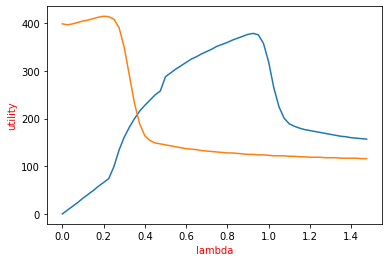

In [85]:
xx = [i/40 for i in range(60)]
plt.plot(xx,revs0)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.plot(xx,revs1)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("bb")
plt.show()

In [3]:
xx = [i/40 for i in range(60)]
plt.plot(xx,max(revs2))
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')
plt.savefig("aa")
plt.show()

NameError: name 'revs2' is not defined

In [96]:
magnifiedrevs0 = [mean0(x/1000) for x in range(900,950,5)] 


landa 0.9 v: 18886515.430000104
landa 0.905 v: 18923156.211999997
landa 0.91 v: 18938754.355000176
landa 0.915 v: 18951645.51100012
landa 0.92 v: 18944248.274999768
landa 0.925 v: 18967131.27100001
landa 0.93 v: 18966742.825000037
landa 0.935 v: 18969327.544999868
landa 0.94 v: 18942526.917000026
landa 0.945 v: 18899260.765000086


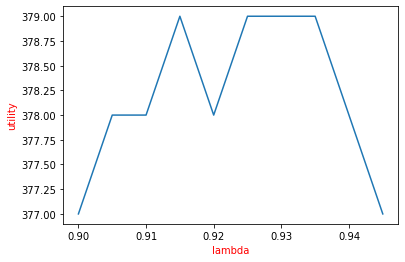

In [99]:
xx = [i/1000 for i in range(900,950,5)]
plt.plot(xx,magnifiedrevs0)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')

plt.show()

In [100]:
magnifiedrevs1 = [mean1(x/1000) for x in range(175,250,5)] 


landa 0.175 v: 20645603.40300009
landa 0.18 v: 20657552.190000113
landa 0.185 v: 20682970.403999917
landa 0.19 v: 20690425.88200002
landa 0.195 v: 20719342.06799999
landa 0.2 v: 20747033.328000054
landa 0.205 v: 20748061.835999787
landa 0.21 v: 20744183.720999993
landa 0.215 v: 20761221.816999912
landa 0.22 v: 20765346.471999824
landa 0.225 v: 20743174.82700004
landa 0.23 v: 20733598.97999972
landa 0.235 v: 20683536.330000054
landa 0.24 v: 20622107.406000093
landa 0.245 v: 20564207.494


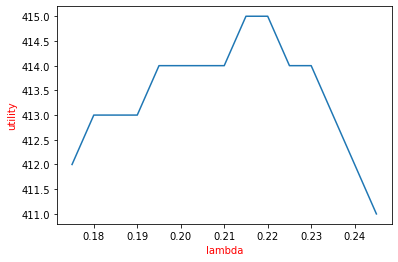

In [101]:
xx = [i/1000 for i in range(175,250,5)]
plt.plot(xx,magnifiedrevs1)
plt.xlabel("lambda",color='r')
plt.ylabel("utility",color='r')

plt.show()